# Assignment 2

**Team members:** Abderrahim KHALIFA & Jonathan Plante

Github repo: https://github.com/ai404/rl_comp767_2019

# Part1:

In [1]:
%reload_ext autoreload
%autoreload 2

from sklearn.model_selection import ParameterGrid
from models import SARSA,QLearning,ExpectedSARSA
from tqdm import tqdm
import pandas as pd
import numpy as np
from gym.spaces.prng import seed
import random

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def run_experiment(agent,description=""):
    SEGMENTS = 100
    TRAIN_EPISODES = 10
    TEST_EPISODES = 1
    RUNS = 10
    
    train_scores = np.zeros((RUNS,SEGMENTS,TRAIN_EPISODES))
    test_scores = np.zeros((RUNS,SEGMENTS,TEST_EPISODES))
    pbar = tqdm(range(RUNS))
    
    for run in pbar:
        agent.reset()
        for segment in range(SEGMENTS):
            pbar.set_description(f"SEGMENT {segment:2d} | "+description)
            train_scores[run,segment,:] = agent.run(n_episodes=TRAIN_EPISODES,verbose=0)
            test_scores[run,segment,:] = agent.run(n_episodes=TEST_EPISODES,mode="test",verbose=0,render=False)
    
    return train_scores,test_scores


In [3]:
def run_grid_search(algorithm,grid,n_seed=42):
    parameters = ParameterGrid(grid)
    history = []
    results_df = pd.DataFrame(columns=["init_temperature","alpha","avg_reward_train","avg_reward_test"])
    print(f"The grid contains {len(parameters)} rows")
    for param in parameters:
        agent = algorithm('Taxi-v2',
                    exploration="softmax",
                    init_temperature=param["init_temperature"],
                    decay=1, 
                    alpha=param["alpha"], 
                    gamma=.9
        )

        description = "training with params:"+" - ".join(map(lambda x:f"{x[0]}={x[1]:1.2f}",param.items()))
        train_scores,test_scores = run_experiment(agent,description = description)
        history.append((train_scores,test_scores))

        avg_reward_test  = test_scores[:,-1,:].mean()
        avg_reward_train = train_scores[:,-1,:].mean()
        results_df = results_df.append(pd.DataFrame([{'alpha': param["alpha"], 
                                                      'init_temperature': param["init_temperature"],
                                                      'avg_reward_train':avg_reward_train,
                                                      'avg_reward_test':avg_reward_test}]),sort=True,ignore_index=True)
    
    return history, results_df


In [20]:
def plot_parameter_influence(grid_results):
    plt.rcParams['figure.figsize'] = 15, 5
    
    # Plot Testing results
    ax = plt.subplot(1,2,2)
    for init_temperature in grid_results["init_temperature"].unique():
        grid_results.loc[grid_results["init_temperature"]==init_temperature].plot(x="alpha",y="avg_reward_test",ax=ax,marker="o", linestyle='dashed',label=f"Temperature = {init_temperature}")
    for i,row in grid_results.iterrows():
        ax.annotate(i, (row["alpha"], row["avg_reward_test"]),xytext=(5,10),textcoords='offset points')
        
    plt.ylabel("Final Reward")
    plt.xlabel("Learning Rate")
    plt.title("Parameters influence on the final reward - Testing")
    
    # Plot Training results
    ax = plt.subplot(1,2,1)
    for init_temperature in grid_results["init_temperature"].unique():
        grid_results.loc[grid_results["init_temperature"]==init_temperature].plot(x="alpha",y="avg_reward_train",ax=ax,marker="o", linestyle='dashed',label=f"Temperature = {init_temperature}")
    
    for i,row in grid_results.iterrows():
        ax.annotate(i, (row["alpha"], row["avg_reward_train"]),xytext=(5,10),textcoords='offset points')
    plt.ylabel("Final Reward")
    plt.xlabel("Learning Rate")
    plt.title("Parameters influence on the final reward - Training")

    plt.show()
    
def plot_learning_curves(history,best_idx):
    plt.rcParams['figure.figsize'] = 15, 10
    train_arr,test_arr = history[best_idx]
    
    # Plot Learning curves
    plt.subplot(2,2,1)
    plt.plot(train_arr.reshape(10,-1).mean(0))
    plt.title("Learning curve - mean - training")
    plt.xlabel("Training steps")
    plt.ylabel("Averaged Reward")
    
    plt.subplot(2,2,2)
    plt.plot(train_arr.reshape(10,-1).std(0))
    plt.title("Learning curve - std - training")
    plt.ylabel("Standard Deviation of Reward")
    plt.xlabel("Training steps")
    
    plt.subplot(2,2,3)
    plt.plot(test_arr.reshape(10,-1).mean(0))
    plt.title("Learning curve - mean - testing")
    plt.ylabel("Averaged Reward")
    plt.xlabel("Testing steps")
    
    plt.subplot(2,2,4)
    plt.plot(test_arr.reshape(10,-1).std(0))
    plt.title("Learning curve - std - testing")
    plt.ylabel("Standard Deviation of Reward")
    plt.xlabel("Testing steps")

    plt.show()


In [5]:
grid = {
    "init_temperature":[.1, 1, 10],
    "alpha":[.1,0.5,.9]
}


## Sarsa

In [6]:
sarsa_history, sarsa_results_df = run_grid_search(SARSA,grid)

/Users/abderrahim/anaconda3/lib/python3.6/site-packages/gym/envs/registration.py:14: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)
SEGMENT  0 | training with params:alpha=0.10 - init_temperature=0.10:   0%|          | 0/10 [00:00<?, ?it/s]

The grid contains 9 rows


SEGMENT 99 | training with params:alpha=0.10 - init_temperature=0.10: 100%|██████████| 10/10 [01:22<00:00,  8.28s/it]
SEGMENT 99 | training with params:alpha=0.10 - init_temperature=1.00: 100%|██████████| 10/10 [01:55<00:00, 11.52s/it]
SEGMENT 99 | training with params:alpha=0.10 - init_temperature=10.00: 100%|██████████| 10/10 [02:44<00:00, 16.47s/it]
SEGMENT 99 | training with params:alpha=0.50 - init_temperature=0.10: 100%|██████████| 10/10 [00:37<00:00,  3.72s/it]
SEGMENT 99 | training with params:alpha=0.50 - init_temperature=1.00: 100%|██████████| 10/10 [00:45<00:00,  4.54s/it]
SEGMENT 99 | training with params:alpha=0.50 - init_temperature=10.00: 100%|██████████| 10/10 [01:23<00:00,  8.30s/it]
SEGMENT 99 | training with params:alpha=0.90 - init_temperature=0.10: 100%|██████████| 10/10 [00:36<00:00,  3.69s/it]
SEGMENT 99 | training with params:alpha=0.90 - init_temperature=1.00: 100%|██████████| 10/10 [00:44<00:00,  4.45s/it]
SEGMENT 99 | training with params:alpha=0.90 - init_te

In [7]:
sarsa_results_df

,alpha,avg_reward_test,avg_reward_train,init_temperature
0,0.1,-74.3,-4.84,0.1
1,0.1,-74.1,-51.48,1.0
2,0.1,-178.7,-412.44,10.0
3,0.5,-13.2,7.31,0.1
4,0.5,7.5,7.37,1.0
5,0.5,-12.5,2.40,10.0
6,0.9,7.8,7.86,0.1
7,0.9,6.8,7.75,1.0
8,0.9,7.9,5.26,10.0


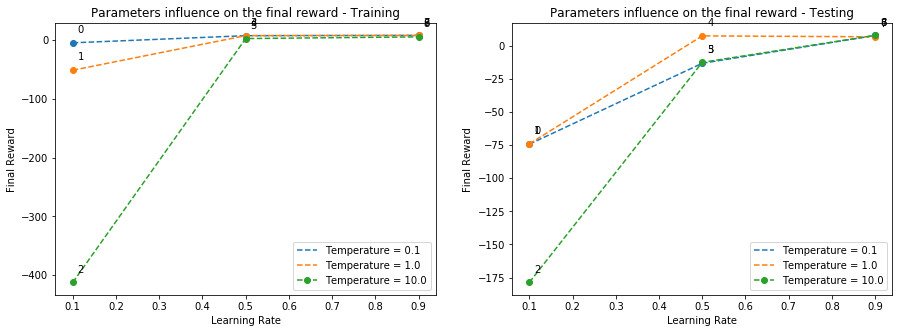

In [8]:
plot_parameter_influence(sarsa_results_df)

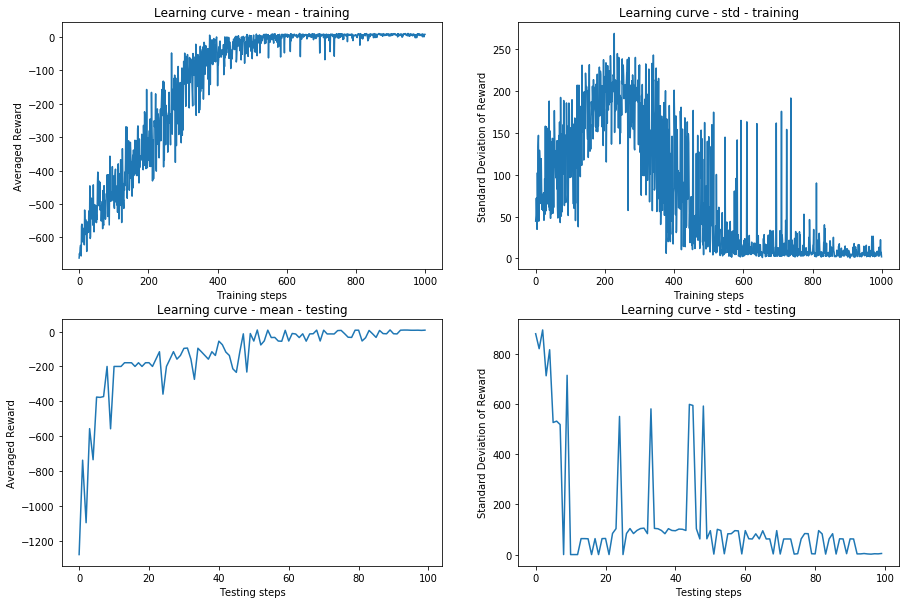

In [42]:
plot_learning_curves(sarsa_history,best_idx=8)

## QLearning

In [10]:
q_history, q_results_df = run_grid_search(QLearning,grid)

/Users/abderrahim/anaconda3/lib/python3.6/site-packages/gym/envs/registration.py:14: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)
SEGMENT  1 | training with params:alpha=0.10 - init_temperature=0.10:   0%|          | 0/10 [00:00<?, ?it/s]

The grid contains 9 rows


SEGMENT 99 | training with params:alpha=0.10 - init_temperature=0.10: 100%|██████████| 10/10 [01:28<00:00,  8.90s/it]
SEGMENT 99 | training with params:alpha=0.10 - init_temperature=1.00: 100%|██████████| 10/10 [01:57<00:00, 11.76s/it]
SEGMENT 99 | training with params:alpha=0.10 - init_temperature=10.00: 100%|██████████| 10/10 [03:01<00:00, 18.18s/it]
SEGMENT 99 | training with params:alpha=0.50 - init_temperature=0.10: 100%|██████████| 10/10 [00:35<00:00,  3.52s/it]
SEGMENT 99 | training with params:alpha=0.50 - init_temperature=1.00: 100%|██████████| 10/10 [00:47<00:00,  4.72s/it]
SEGMENT 99 | training with params:alpha=0.50 - init_temperature=10.00: 100%|██████████| 10/10 [01:24<00:00,  8.40s/it]
SEGMENT 99 | training with params:alpha=0.90 - init_temperature=0.10: 100%|██████████| 10/10 [00:35<00:00,  3.53s/it]
SEGMENT 99 | training with params:alpha=0.90 - init_temperature=1.00: 100%|██████████| 10/10 [00:37<00:00,  3.78s/it]
SEGMENT 99 | training with params:alpha=0.90 - init_te

In [11]:
q_results_df

,alpha,avg_reward_test,avg_reward_train,init_temperature
0,0.1,-137.3,-4.28,0.1
1,0.1,-53.6,-42.80,1.0
2,0.1,-11.4,-387.95,10.0
3,0.5,9.2,7.85,0.1
4,0.5,8.6,7.48,1.0
5,0.5,8.3,2.85,10.0
6,0.9,9.8,8.15,0.1
7,0.9,8.3,8.17,1.0
8,0.9,-11.4,3.71,10.0


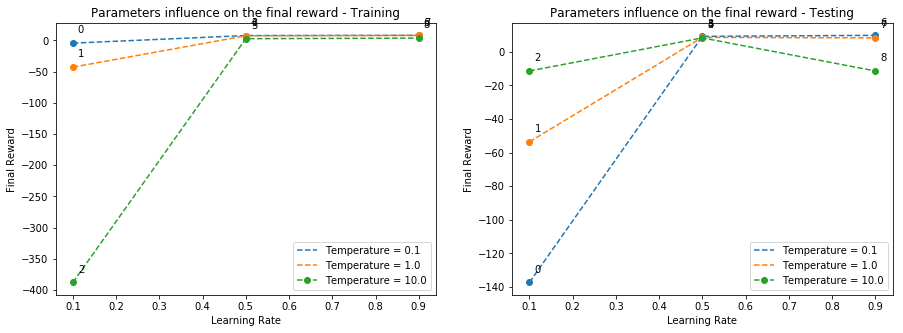

In [12]:
plot_parameter_influence(q_results_df)

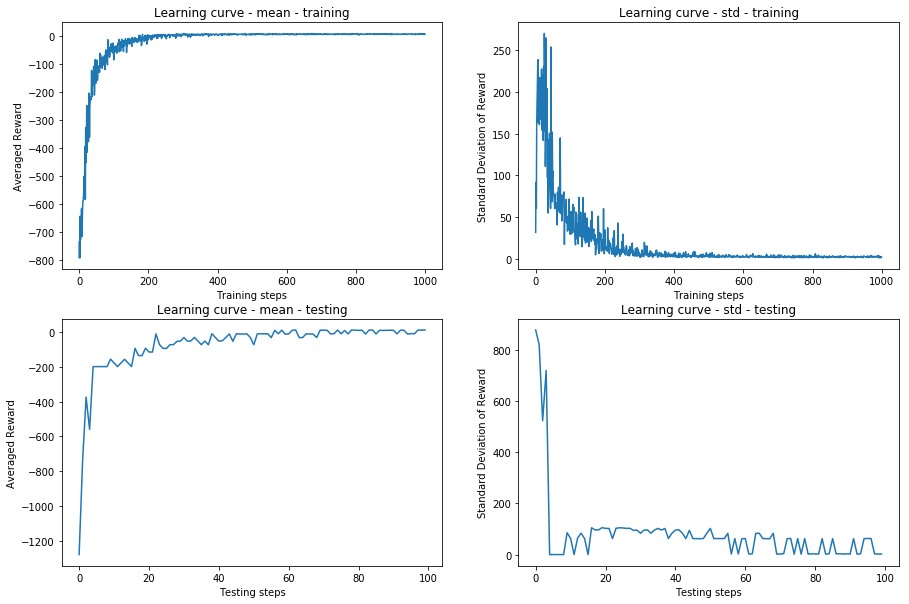

In [23]:
plot_learning_curves(q_history,best_idx=6)

## ExpectedSARSA

In [14]:
exsarsa_history, exsarsa_results_df = run_grid_search(ExpectedSARSA,grid)

/Users/abderrahim/anaconda3/lib/python3.6/site-packages/gym/envs/registration.py:14: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)
SEGMENT  0 | training with params:alpha=0.10 - init_temperature=0.10:   0%|          | 0/10 [00:00<?, ?it/s]

The grid contains 9 rows


SEGMENT 99 | training with params:alpha=0.10 - init_temperature=0.10: 100%|██████████| 10/10 [01:48<00:00, 10.84s/it]
SEGMENT 99 | training with params:alpha=0.10 - init_temperature=1.00: 100%|██████████| 10/10 [02:38<00:00, 15.89s/it]
SEGMENT 99 | training with params:alpha=0.10 - init_temperature=10.00: 100%|██████████| 10/10 [03:34<00:00, 21.49s/it]
SEGMENT 99 | training with params:alpha=0.50 - init_temperature=0.10: 100%|██████████| 10/10 [00:44<00:00,  4.46s/it]
SEGMENT 99 | training with params:alpha=0.50 - init_temperature=1.00: 100%|██████████| 10/10 [00:55<00:00,  5.54s/it]
SEGMENT 99 | training with params:alpha=0.50 - init_temperature=10.00: 100%|██████████| 10/10 [01:45<00:00, 10.59s/it]
SEGMENT 99 | training with params:alpha=0.90 - init_temperature=0.10: 100%|██████████| 10/10 [00:41<00:00,  4.17s/it]
SEGMENT 99 | training with params:alpha=0.90 - init_temperature=1.00: 100%|██████████| 10/10 [00:54<00:00,  5.43s/it]
SEGMENT 99 | training with params:alpha=0.90 - init_te

In [15]:
exsarsa_results_df

,alpha,avg_reward_test,avg_reward_train,init_temperature
0,0.1,-52.6,-3.46,0.1
1,0.1,-53.0,-61.94,1.0
2,0.1,-179.3,-450.18,10.0
3,0.5,8.6,8.01,0.1
4,0.5,6.1,7.48,1.0
5,0.5,-12.7,5.23,10.0
6,0.9,8.8,8.06,0.1
7,0.9,-13.4,7.24,1.0
8,0.9,-12.8,6.40,10.0


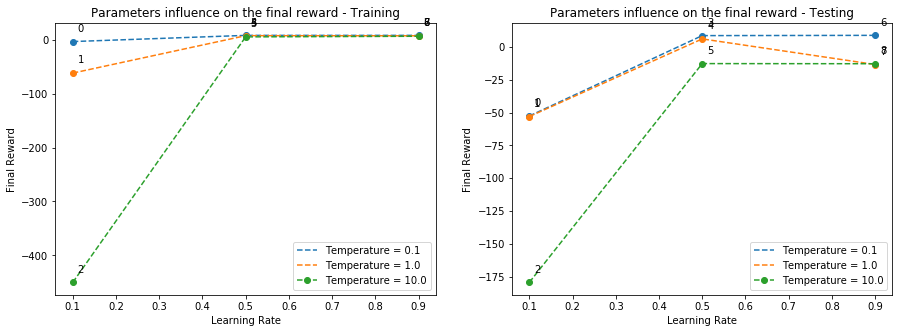

In [16]:
plot_parameter_influence(exsarsa_results_df)

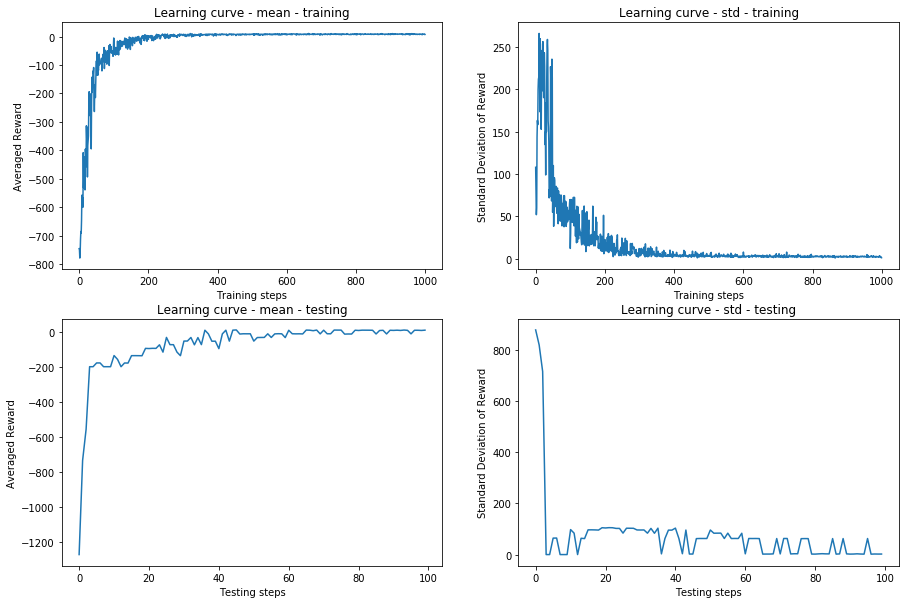

In [24]:
plot_learning_curves(exsarsa_history,best_idx=6)

**Discussion:**

In this part of the assignment, we performed some experiments with three algorithms (Sarsa, Q learning and expected Sarsa) on the Taxi-v2 OpenAI gym. For each experiment we picked a temperature value and a learning rate and then ran the three algorithms in 100 segments, each composed of 10 episodes for training followed by an episode for testing where we ran the greedy policy we learnt so far.

We have chosen three temperature values with a factor of 10 to transition from one temperature to the next one. We picked 0.1, 1 and 10 for these experiments. 

We wanted to cover the whole range of possible values for the learning rate, but since we only had to pick 3 values we chose the midpoint of the range and two other learning rates with the same distance from the bounds of the range. The values we considered are: \[0.1, 0.5, 0.9\]

From the graphs, we notice that the experiments with the highest temperature value of 10 and a learning rate of 0.1 tends to be the worst at both training and testing with a large gap compared to the two other temperature values. However, the gap decreases once we use a sufficiently high learning rate, but experiments with the highest temperature are still slightly worst at training. This pattern can be observed in the three algorithms.

This impact of the temperature on training can be explained with the following analysis:

Suppose we have *d* actions. Let $q\in \mathbb R^d$ be the vector denoting the action-value function taken at a state $s$ and $S_i(q) = \exp(q_i) / \sum_j\exp(q_j)$ be the probability of picking the $ith$ action while exploring given by the boltzman distribution. Let $A_t(q) = S(\frac{q}{t}) = \exp(\frac{q_i}{t}) / \sum_j\exp(\frac{q_j}{t})$ where t is a positive real number. We notice that when t is pushed towards infinity we get $\lim_{t \rightarrow \infty} S_i(\frac{q}{t}) = 1 / d$. That is we have equal probabilities for all actions, thus the higher the constant t is, the more our algorithm is favoring exploration against the greedy behavior leading to a poor behaviour in training. However when t is heading toward zero we can prove that $\lim_{t \rightarrow 0} S_i(\frac{q}{t}) = \mathbb 1_{q_i = \max_{j}(q_j)} / \ell$ where $\ell$ is the number of actions with the same highest q-value. Therefore, if we suppose that there is only one best action $i$ (with respect to the correct q-value) than the probability of taking that action is $\lim_{t \rightarrow 0} S_i(\frac{q}{t}) = 1$ and it's a zero probability for the non-greedy actions. In this case, with low values of t we tend to be favoring the greedy behavior and thus exploiting what we have already learned instead of exploring new actions.

The advantage of the boltzman distribution is that it mimics the $\epsilon$-gready behaviour but with two other interesting advantages: 

- Through the parameter t, it gives us the control of how much exploring we want our agent to do, the higher t is the more we get closer to a pure $\epsilon$-greedy algorithm.

- It gives weighted chances for actions to be considered: sub-optimal actions have higher chances of being selected instead of selecting amongst all the actions with an equal probability.

In terms of learning rate, we see that higher learning rates are generaly better at training, but at testing for some values of the temperature the the final score drops with high learning rates.

In terms of learning curves, when comparing all three algorithms we notice that expected sarsa seems to be the most stable of 3. There is much less noise in the average reward graph at testing. Sarsa seems the least stable at testing. But this can also be a consequence of the high temperature used in the best settings for SARSA.

Finally when looking at the variance graphs at training we notice: Q learning and expected Sarsa drop steadily and smoothly, while Sarsa drops but very noisily. We also notice that once the average reward value has converged, the variance has converged also to a low value.